# Assignment 1 - Decision Trees and Clustering Techniques

## *Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB*

### by Catarina Silva and Marco SimÃµes

_

This assignment will assess the students knowledge on the following Machine Learning topics:
- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 1-a) Decision Trees (first week) and 1-b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: *06/10/2021*

## Conditions: 
- *Groups:* two elements of the same PL class
- *Duration:* 2 weeks
- *Workload:* 8h per student
 


# Assignment 1 - a) Decision Trees

Consider the depression dataset, from Agresti, A. (2019). _An introduction to categorical data analysis (2nd ed.). John Wiley & Sons._ This dataset is composed by evaluations of 335 patients during 3 phase treatment. We want to learn a decision tree that, given the attributes A - Diagnosis Severity (0: Mild, 1: Severe), B - Treatment Type (0: Standard, 1: New drug) and C - Follow Up Time (0: 1 week, 1: 2 weeks, 2: 4 weeks), predicts D - Depression Outcome (0: Normal, 1: Abnormal).




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text

from statistics import stdev


data=pd.read_csv('./depression.csv')

***
### Ex. 1
Create a function `attr_probs( data, attr )` that, given the dataset (`data`) and a attribute id (`attr`), computes the percentage of cases with Abnormal treatment outcome (D) for each attribute *value*. The function should return a dictionary with the different attribute values as keys and the correspondent percentages as values. Example: `attr_probs( data, 'A')` -> returns `{0: 0.67, 1: 0.41}`

In [11]:
OUTCOME='D'

def attr_probs(data,attr):
    probs={}
    values=np.unique(data[attr])
    for i in values:
        rows=data.loc[data[attr] == i]
        negative=np.count_nonzero(rows[OUTCOME]==0)
        positive=np.count_nonzero(rows[OUTCOME]==1)

        probs[i]=positive/(positive+negative)

    return probs

***
### Ex. 2
Create a function `entropy( probs )` that, given a list probability values, returns the correspondent **entropy** value.

In [12]:
def entropy(probs):
    entropy=0
    for i,value in enumerate(probs):
        if value!=0:
            entropy-=value*np.log2(value)
    return entropy

In [13]:
# example
print(entropy([2/8, 0/8, 4/8, 2/8])) # should print 1.5

1.5


***
### Ex. 3 
Create a function `gain( data, attr )` to compute the gain of an attribute. Make use of the functions developed in the previous exercises.

In [14]:
def gain(data,attr):
    total=data.shape[0]
    sum=0

    for key,value in attr_probs(data,attr).items():
        nRows=len(data.loc[data[attr]==key])
        portion=nRows/total
        entropyS=entropy([value,1-value])
        sum+=entropyS*portion

    portion=np.count_nonzero(data[OUTCOME]==1)/total
    gain=entropy([portion,1-portion])-sum
    return gain

***
### Ex. 4 

Run the following code to compute the gain for the different attributes (*expected partial output:* `Gain A: 0.05`). In what does those results influence the design of the decision tree?

In [15]:
ATTRS = ['A', 'B', 'C']
for attr in ATTRS:
    print('Gain {attr}: {gain:.2f}'.format(attr=attr, gain=gain(data, attr)))

print('Gain: {gain:.2f}'.format(gain=gain(data.loc[data['C']<=1.5], 'A')))
print('Gain: {gain:.2f}'.format(gain=gain(data.loc[data['C']<=1.5], 'B')))

Gain A: 0.05
Gain B: 0.02
Gain C: 0.07
Gain: 0.07
Gain: 0.01



**Answer:**

Attributes with the most gain will be placed higher in the tree. For example, the root of the tree will be the attribute 'C' because it has the highest gain of all attributes (0.07>0.05>0.02).   

***
### Ex. 5

Split the dataset into two sets (train set and test set), assigning randomly $70\%$ of the cases to the train set and the remaining $30\%$ to the test set. Use the `train_test_split` method from the `sklearn.model_selection` module, specifying the `random_state` with a value of $7$ for reproducibility purposes.

Train a `DecisionTreeClassifier` (from the `sklearn.tree` module) using the training data. Enforce the use of the `entropy` criterion instead of the `gini` criterion. 

Resort to the function `export_text` from the `sklearn.tree` module to visualize the structure of the resulting tree. Are the results of **Ex. 4** congruent with the tree obtained here? Justify.



In [16]:
labels=data.iloc[:,-1]
samples=data.iloc[:,:-1]

x_train,x_test,y_train,y_test=train_test_split(samples,labels,test_size=0.3,random_state=7)

tree=DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train,y_train)

y_pred = tree.predict(x_test)
print(classification_report(y_test,y_pred))

print(export_text(decision_tree=tree,feature_names=['A','B','C']))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       154
           1       0.66      0.76      0.71       152

    accuracy                           0.69       306
   macro avg       0.69      0.69      0.68       306
weighted avg       0.69      0.69      0.68       306

|--- C <= 1.50
|   |--- A <= 0.50
|   |   |--- B <= 0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |   |--- B >  0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |--- A >  0.50
|   |   |--- C <= 0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 0
|   |   |--- C >  0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 1
|--- C >  1.50
|   |--- B <= 0.50
|   |   |--- A <= 0.50
|   |   |   |--


**Answer:**

Yes. 'C' is the root attribute as expected because it has the highest gain. Subsequently, in branch ('C'<=1.5), attribute A is the root because its gain for all data with ('C'<=1.5) is greater than the gain of B for the same data. According to our gain function, gain of A when ('C'<=1.5) is 0.07 while gain of B is 0.01. The same logic can be applied to the remmaining branches.

***
### Ex 6

Looking for the structure of the tree printed, evaluate the following cases (by hand) and provide the outcome class for each case, as well as the path from the root to the leaf (meaning, provide the conditions it evaluated as true to reach that class).

**Cases:**<p>
c1 = (A=1, B=0, C=2)<p>
c2 = (A=0, B=0, C=0)<p>
c3 = (A=0, B=0, C=1)<p>
c4 = (A=1, B=1, C=0)<p>


**Example:**<p>
case: cx = (A=1, B=1, C=1)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C > 0.5) --> (B > 0.5) --> class 1<p>


**Answer:**

case: c1 = (A=1, B=0, C=2)<p>
path: (C > 1.5) --> (B <= 0.5) --> (A > 0.5) --> class 0<p>
_

case: c2 = (A=0, B=0, C=0)<p>
path: (C <= 1.5) --> (A <= 0.5) --> (B <= 0.5) --> (C <= 0.5) --> class 1<p>
_

case: c3 = (A=0, B=0, C=1)<p>
path: (C <= 1.5) --> (A <= 0.5) --> (B <= 0.5) --> (C > 0.5) --> class 1<p>
_

case: c4 = (A=1, B=1, C=0)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C <= 0.5) --> (B > 0.5) --> class 0<p>



***
### Ex. 7

Apply the decision tree trained in the previous exercise to the test data. Compare the predicted labels to the true labels, generating a confusion matrix (you can use the `confusion_matrix` function of the `sklearn.metrics` module for that). Report the **percentage** of `True Positives, True Negatives, False Positives and False Negatives`, as well as the metrics `accuracy, precision, recall and f1-score`.


In [23]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_pred).ravel()

values = [true_negative, false_positive, false_negative, true_positive]
labels = ['true_negative', 'false_positive', 'false_negative', 'true_positive']
for i, value in enumerate(values):
    print('{attr}: {value:.1f} %'.format(attr=labels[i], value= 100*value/y_pred.size))

print()

#accuracy, precision, recall and f1-score .

values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
labels = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score']

for i, value in enumerate(values):
    print('{attr}: {value:.2f}'.format(attr=labels[i], value= value))

306 - 306
true_negative: 31.0 %
false_positive: 19.3 %
false_negative: 12.1 %
true_positive: 37.6 %

accuracy_score: 0.69
precision_score: 0.66
recall_score: 0.76
f1_score: 0.71


***
### Ex. 8
Repeat the process of spliting the data, training the classifier and testing the classifier 100 times (use the values from 0 to 99 as `random_state` for the `train_test_split`function). Plot the accuracy across the 100 repetitions, reporting also its mean value and standard deviation.


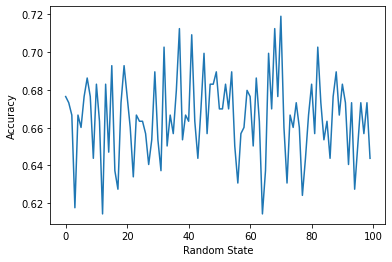

Average: 0.67
Standard Deviation: 0.02


In [18]:
def plot_accuracy():
    accuracy = np.array([])

    for i in range(0,100):
        labels=data.iloc[:,-1]
        samples=data.iloc[:,:-1]

        x_train,x_test,y_train,y_test=train_test_split(samples,labels,test_size=0.3,random_state=i)
        tree=DecisionTreeClassifier(criterion="entropy")
        tree.fit(x_train,y_train)
        y_pred = tree.predict(x_test)

        accuracy = np.append(accuracy, accuracy_score(y_test, y_pred))
    return accuracy
    
accuracy = plot_accuracy()
plt.plot(np.arange(100), accuracy)
plt.xlabel(xlabel='Random State')
plt.ylabel(ylabel='Accuracy')


plt.show()

print("Average: {value:.2f}".format(value= sum(accuracy)/100))
print("Standard Deviation: {value:.2f}".format(value= stdev(accuracy)))